In [94]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from IPython.display import Image, display
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Datos experimentales - Láser de helio-neón

In [95]:
# Constantes
longitud_de_onda_laser = 633 * (10 ** -9) # lambda del láser de helio-neón en metros
numero_de_onda_laser = 2 * np.pi / longitud_de_onda_laser # número de onda del láser de helio-neón

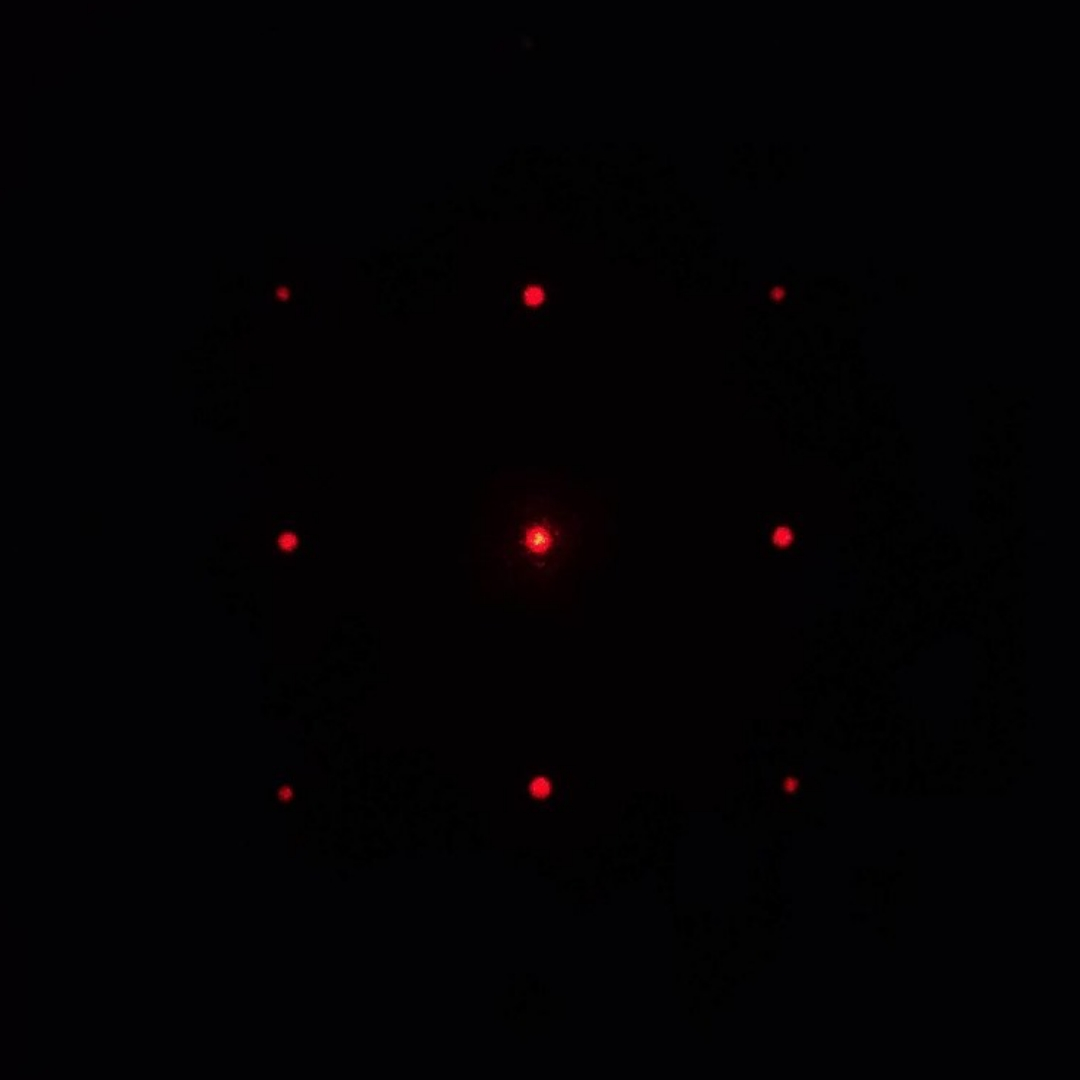

,distancia-laser-rejilla-metros,distancia-rejilla-pantalla-metros,incertidumbre-flexómetro,distancia-maximos-consecutivos-metros,incertidumbre-calibrador
0,0.516,0.13,0.001,0.12728,0.00002


In [96]:
#@title Rejilla con difracción de Fresnel
# Dataframe de datos para el montaje de la rejilla con difracción de Fresnel
datos_rejilla_fresnel = pd.DataFrame({"distancia-laser-rejilla-metros": [0.516],
                                      "distancia-rejilla-pantalla-metros": [0.13],
                                      "incertidumbre-flexómetro": [0.001],
                                      "distancia-maximos-consecutivos-metros": [0.12728],
                                      "incertidumbre-calibrador": [0.00002]})

# Mostrando imagen de la rejilla con difracción de Fresnel
imagen = Image(filename='/content/drive/MyDrive/Física Experimental III/Prelaboratorio 1/Imagenes/Difracción-rejilla-fresnel.jpg', width=300, height=300)
display(imagen)
datos_rejilla_fresnel

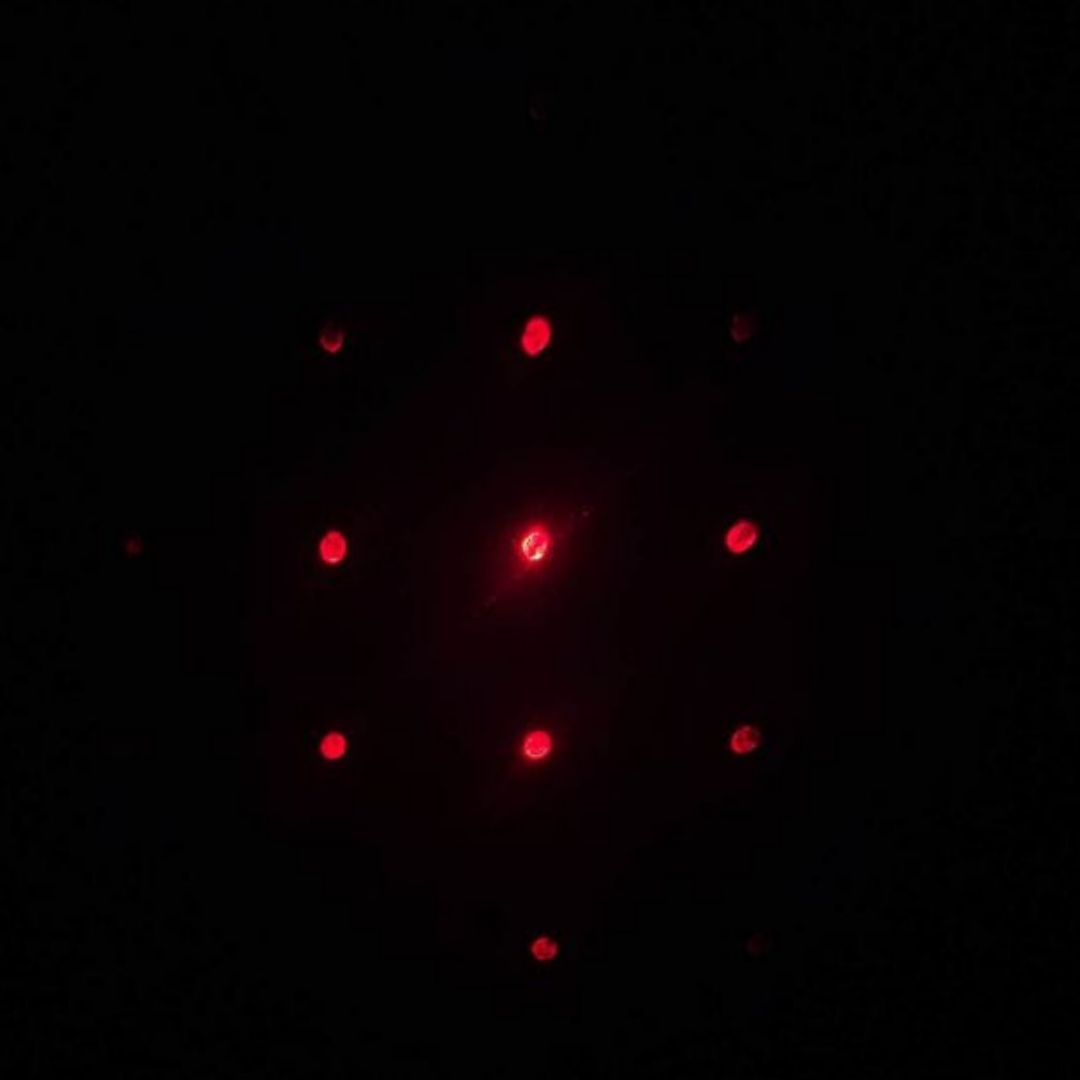

,distancia-lente-pantalla-metros,incertidumbre-flexómetro,distancia-maximos-consecutivos-metros,incertidumbre-calibrador
0,0.14,0.001,POR DEFINIR,0.00002


In [97]:
#@title Rejilla con difracción de Fraunhofer
# Dataframe de datos para el montaje de la rejilla con difracción de Fraunhofer
datos_rejilla_fraunhofer = pd.DataFrame({"distancia-lente-pantalla-metros": [0.14],
                                         "incertidumbre-flexómetro": [0.001],
                                         "distancia-maximos-consecutivos-metros": ["POR DEFINIR"],
                                         "incertidumbre-calibrador": [0.00002]})

# Mostrando imagen de la rejilla con difracción de Fraunhofer
imagen = Image(filename='/content/drive/MyDrive/Física Experimental III/Prelaboratorio 1/Imagenes/Difracción-rejilla-fraunhofer.jpg', width=300, height=300)
display(imagen)
datos_rejilla_fraunhofer

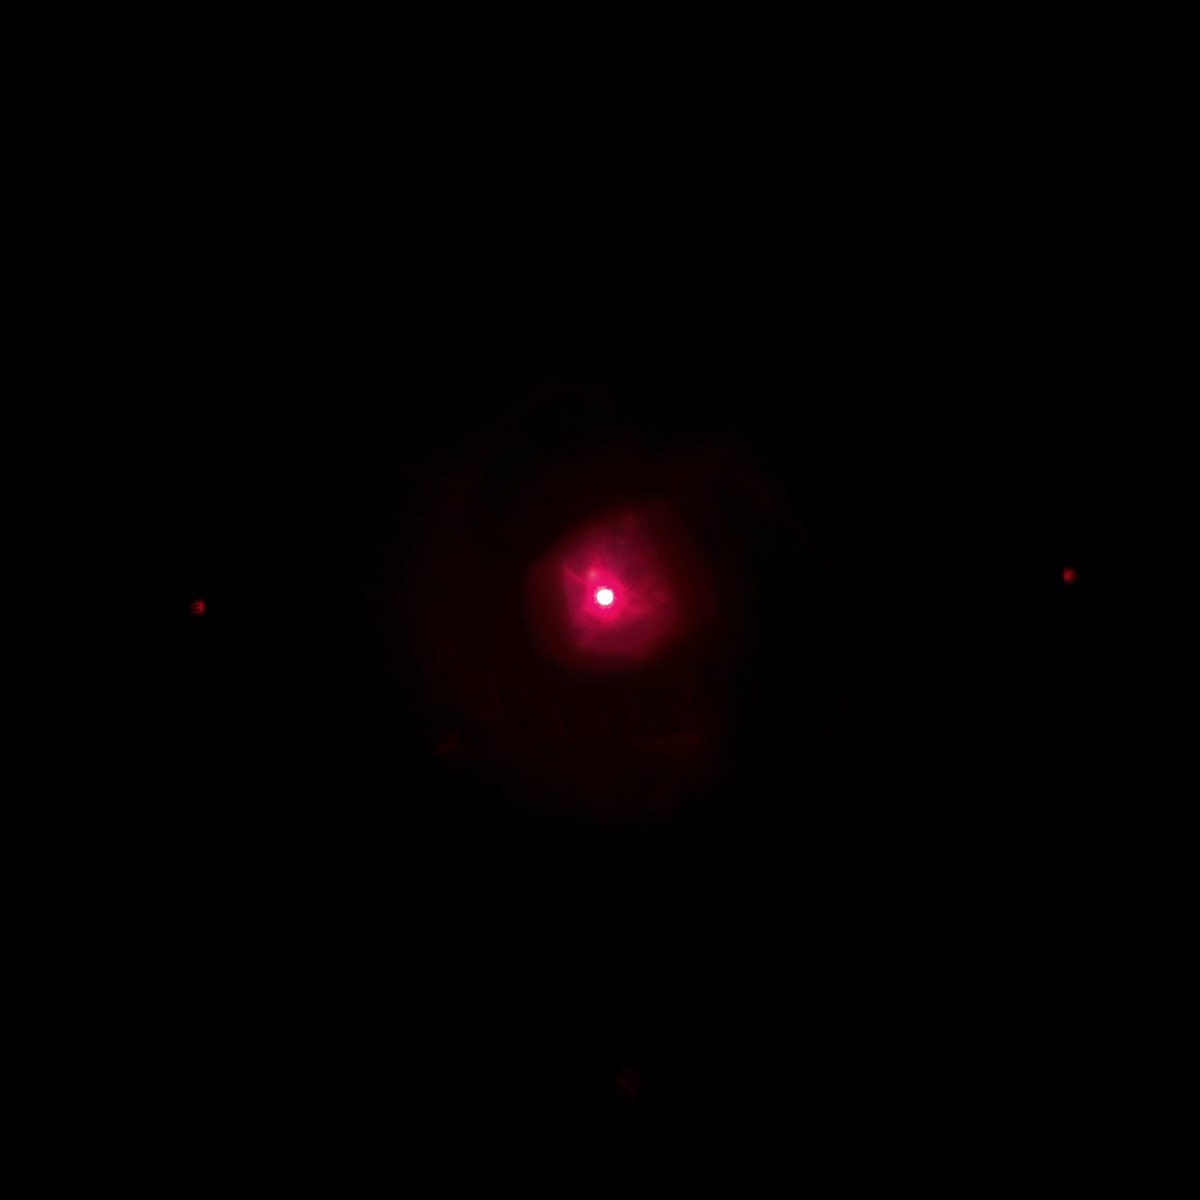

,distancia-lente-pantalla-metros,incertidumbre-flexómetro,distancia-maximos-consecutivos-metros,incertidumbre-calibrador
0,0.14,0.001,0.13184,0.00002


In [98]:
#@title Cd con difracción de Fraunhofer
# Dataframe de datos para el montaje del cd con difracción de Fraunhofer
datos_cd_fraunhofer = pd.DataFrame({"distancia-lente-pantalla-metros": [0.14],
                                    "incertidumbre-flexómetro": [0.001],
                                    "distancia-maximos-consecutivos-metros": [0.13184],
                                    "incertidumbre-calibrador": [0.00002]})

# Mostrando imagen del cd con difracción de Fraunhofer
imagen = Image(filename='/content/drive/MyDrive/Física Experimental III/Prelaboratorio 1/Imagenes/Difracción-cd-fraunhofer.jpg', width=300, height=300)
display(imagen)
datos_cd_fraunhofer

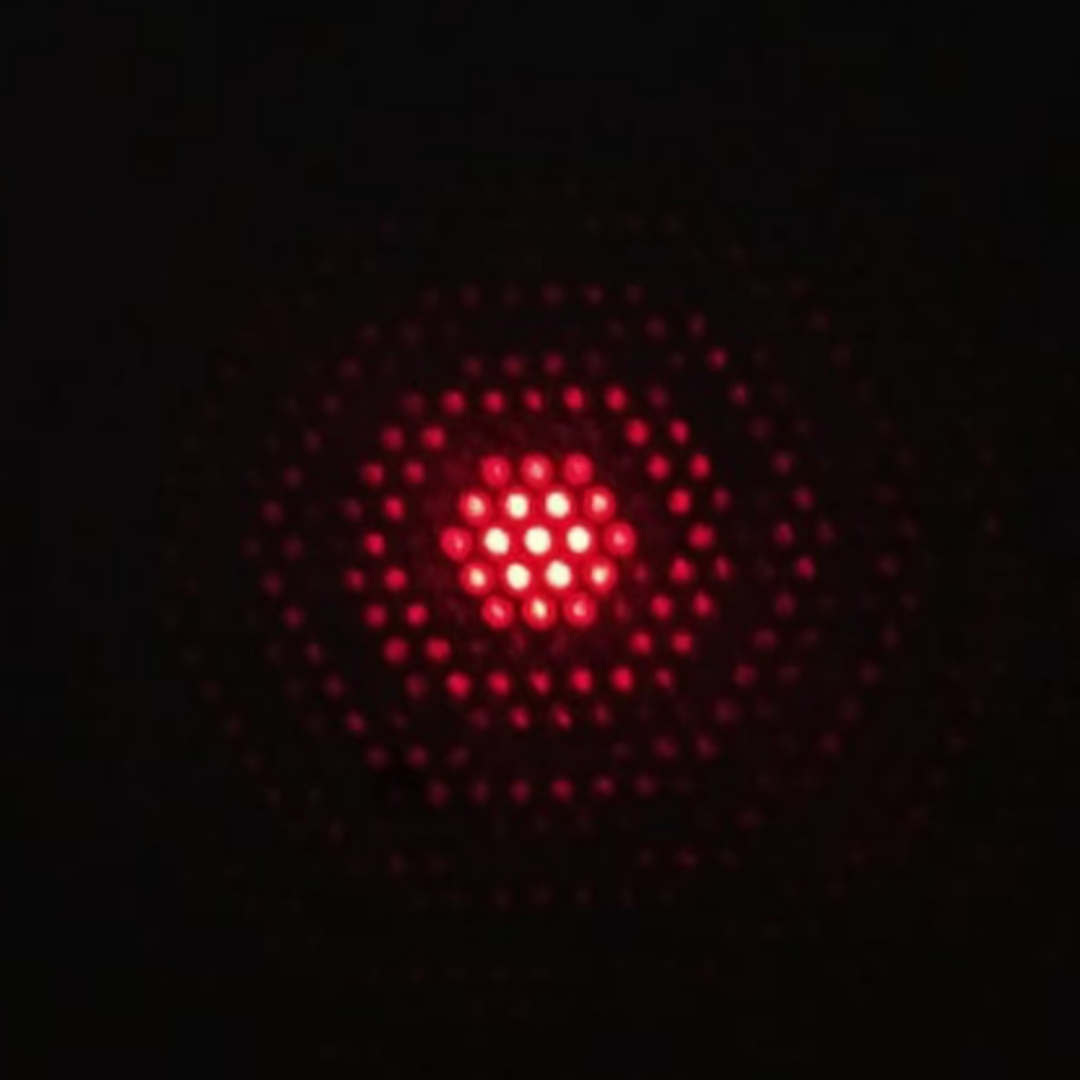

,distancia-gem-pantalla-metros,incertidumbre-flexómetro,distancia-maximos-consecutivos-metros,incertidumbre-calibrador
0,0.33,0.001,0.009,0.00002


In [99]:
#@title Gem con difracción de Fresnel
# Dataframe de datos para el montaje del GEM, del CERN con difracción de Fresnel
datos_gem_fresnel = pd.DataFrame({"distancia-gem-pantalla-metros": [0.33],
                                  "incertidumbre-flexómetro": [0.001],
                                  "distancia-maximos-consecutivos-metros": [0.009],
                                  "incertidumbre-calibrador": [0.00002]})

# Mostrando imagen del GEM del CERN con difracción de Fresnel
imagen = Image(filename='/content/drive/MyDrive/Física Experimental III/Prelaboratorio 1/Imagenes/Difracción-gem-fresnel.jpg', width=300, height=300)
display(imagen)
datos_gem_fresnel

# Código de Estiven

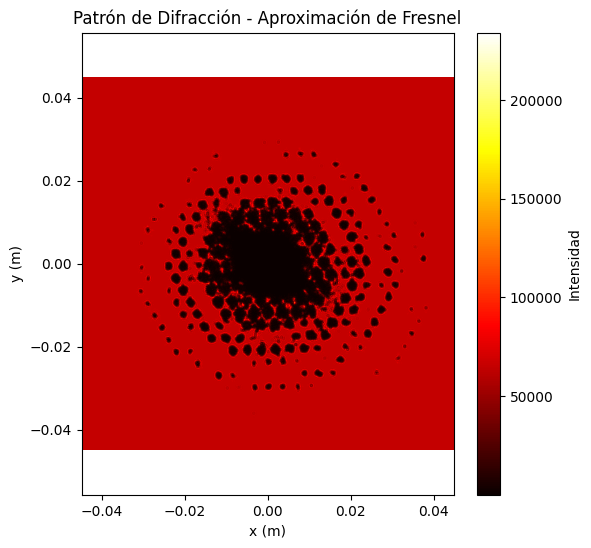

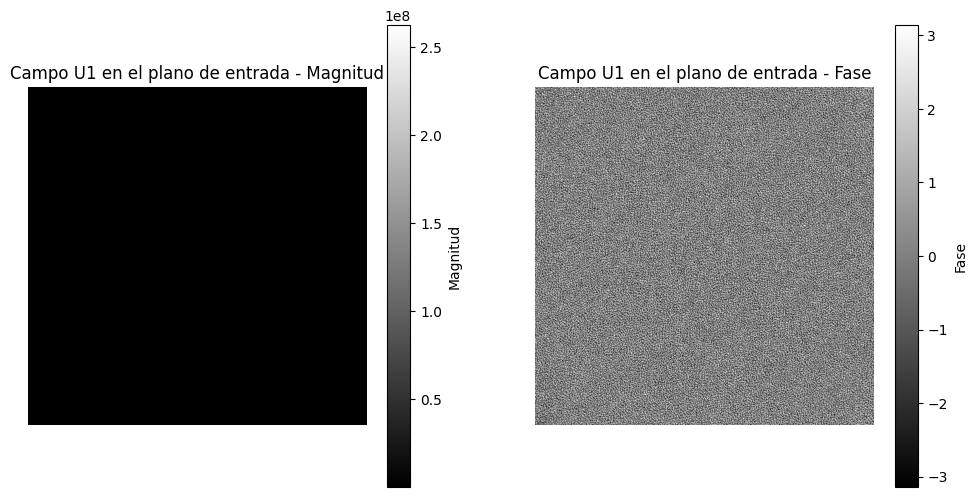

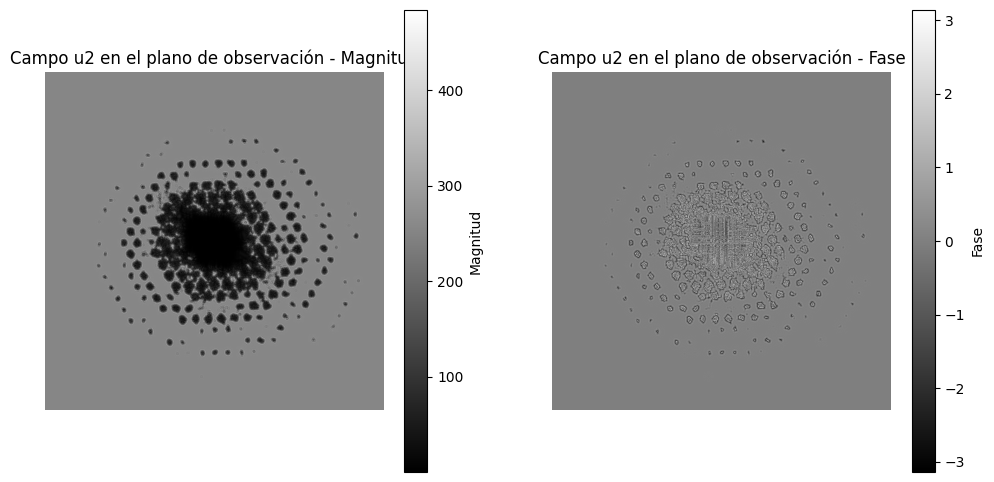

In [103]:
def procesar_imagen(filename):
    """
    Lee y procesa una imagen en escala de grises para obtener una representación binaria de las rendijas.
    """
    def imread_to_grayscale(filename):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    # Leer la imagen en escala de grises
    image = imread_to_grayscale(filename)
    image_invertida = 255 - image

    # Aplicar umbral binario
    _, image_binaria = cv2.threshold(image_invertida, 230, 255, cv2.THRESH_BINARY)

    return image_binaria

def calcular_prop_fresnel(imagen_binaria, lam, z, dx):
    """
    Calcula la propagación de Fresnel para una imagen binaria usando la Transformada de Fourier.

    Args:
        imagen_binaria (numpy.ndarray): Imagen procesada de la rendija.
        lam (float): Longitud de onda de la luz.
        z (float): Distancia de propagación.
        dx (float): Resolución espacial (tamaño de pixel) en el plano de la imagen.

    Returns:
        tuple: Intensidad de la imagen difractada en el plano de observación y el campo `u1`.
    """
    N = imagen_binaria.shape[0]
    k = 2 * np.pi / lam  # Número de onda

    # Crear coordenadas de frecuencia espacial
    fx = np.fft.fftfreq(N, dx)
    FX, FY = np.meshgrid(fx, fx)

    # Calcular el propagador de Fresnel en el espacio de frecuencias
    H = np.exp(1j * np.pi * lam * z * (FX**2 + FY**2))

    # Transformada de Fourier de la imagen de entrada
    U1 = np.fft.fft2(np.fft.fftshift(imagen_binaria))

    # Multiplicar en el dominio de Fourier (aplicando el propagador)
    U2 = H * U1

    # Transformada inversa para obtener el campo en el plano de observación
    u2 = np.fft.ifftshift(np.fft.ifft2(U2))
    intensidad = np.abs(u2)**2  # Intensidad de la imagen difractada

    return intensidad, U1, u2

# Parámetros experimentales
filename = '/content/drive/MyDrive/Física Experimental III/Prelaboratorio 1/Imagenes/Difracción-gem-fresnel-test.jpg'
lam = 633e-9  # Longitud de onda en metros (ejemplo: luz roja de láser)
z = 0.33 # Distancia de propagación en metros
dx = 8.3e-5  # Resolución espacial en el plano de la imagen

# Procesar la imagen y calcular la difracción
imagen_binaria = procesar_imagen(filename)
tamaño_cuadrado = imagen_binaria.shape[0]
intensidad_difractada, U1, u2 = calcular_prop_fresnel(imagen_binaria, lam, z, dx)

# Mostrar la intensidad difractada en el plano de observación
plt.figure(figsize=(6, 6))
plt.imshow(intensidad_difractada, cmap='hot', extent=(-dx * tamaño_cuadrado / 2, dx * tamaño_cuadrado / 2,
                                                      -dx * tamaño_cuadrado / 2, dx * tamaño_cuadrado / 2))
plt.colorbar(label='Intensidad')
plt.title('Patrón de Difracción - Aproximación de Fresnel')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('equal')
plt.show()

# Mostrar el campo `U1` en el plano de entrada (magnitud y fase)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(np.abs(U1), cmap='gray')
plt.colorbar(label='Magnitud')
plt.title('Campo U1 en el plano de entrada - Magnitud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.angle(U1), cmap='gray')
plt.colorbar(label='Fase')
plt.title('Campo U1 en el plano de entrada - Fase')
plt.axis('off')
plt.show()

# Mostrar el campo `u2` en el plano de observación (magnitud y fase)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(np.abs(u2), cmap='gray')
plt.colorbar(label='Magnitud')
plt.title('Campo u2 en el plano de observación - Magnitud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.angle(u2), cmap='gray')
plt.colorbar(label='Fase')
plt.title('Campo u2 en el plano de observación - Fase')
plt.axis('off')
plt.show()


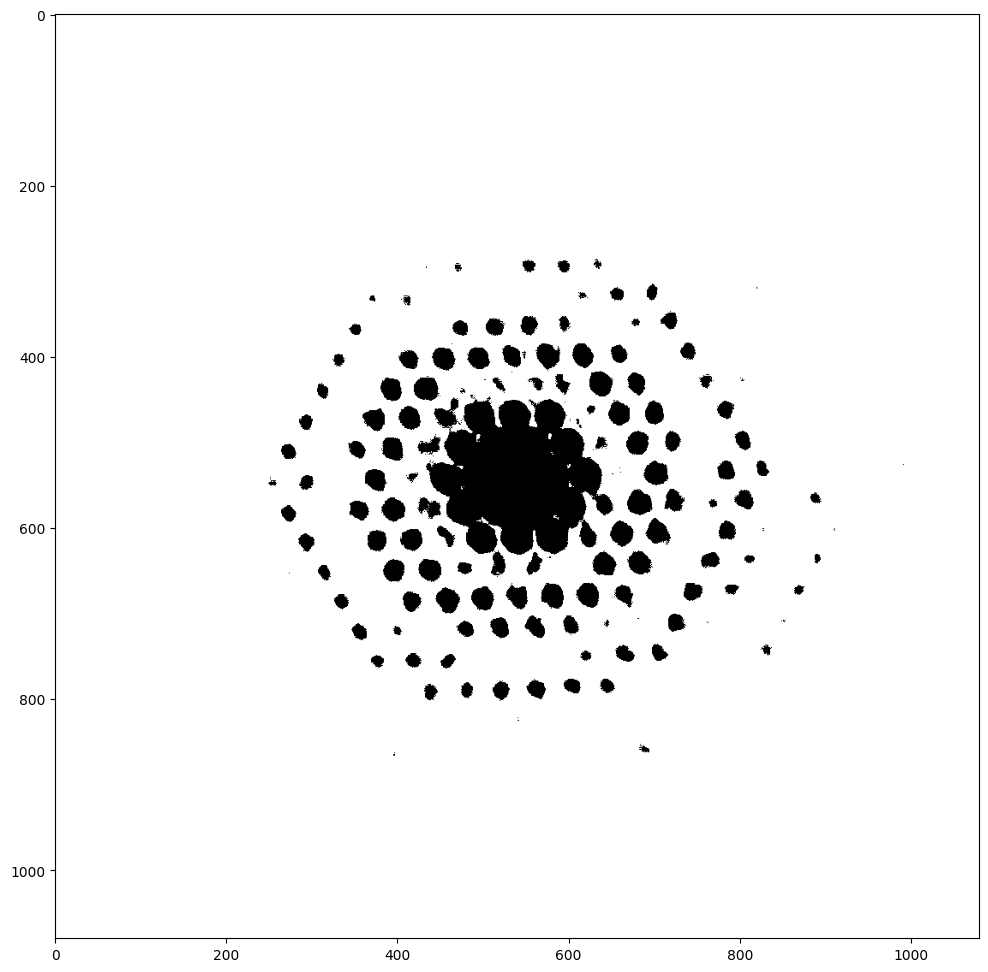

In [101]:
# Mostrando imagen_binaria
plt.imshow(imagen_binaria, cmap='gray')
plt.show()

In [102]:
U1

array([[ 2.81465175e+08     +0.j        ,
        -1.28073744e+07+410896.15634335j,
        -6.68678966e+06 +45302.56979345j, ...,
        -2.65499482e+06+365804.92729568j,
        -6.68678966e+06 -45302.56979345j,
        -1.28073744e+07-410896.15634335j],
       [-1.34113384e+07+866281.89592288j,
        -1.06726369e+07+885607.41126208j,
        -5.66650553e+06+135665.57423436j, ...,
        -2.31899869e+06+425681.34383698j,
        -5.60737043e+06+259731.5999909j ,
        -1.08095217e+07+329690.3810929j ],
       [-7.96773466e+06+744696.76357968j,
        -6.20275563e+06+487105.35164867j,
        -3.39585970e+06-180332.8818657j , ...,
        -1.90301332e+06+341501.48682163j,
        -3.57081828e+06+235296.92283939j,
        -6.55383309e+06+399090.51092282j],
       ...,
       [-3.57908596e+06 -94378.92439028j,
        -3.22748999e+06 +35217.13312893j,
        -2.21138121e+06 +72183.2004287j , ...,
        -1.30395541e+06+260187.27089601j,
        -1.59880957e+06+395828.4288183j ,